In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print("cfg_env",cfg_env)

seed 0
cfg_env cartpole


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(16469.1855)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 17793.77168  validloss 1905589.98579±0.00000  bestvalidloss 1905589.98579  last_update 0
train: iter 1  trainloss 1931.93514  validloss 17811.53105±0.00000  bestvalidloss 17811.53105  last_update 0
train: iter 2  trainloss 1215.24433  validloss 5788.70973±0.00000  bestvalidloss 5788.70973  last_update 0
train: iter 3  trainloss 1025.86580  validloss 3214.20152±0.00000  bestvalidloss 3214.20152  last_update 0
train: iter 4  trainloss 916.88125  validloss 2390.12367±0.00000  bestvalidloss 2390.12367  last_update 0
train: iter 5  trainloss 885.06088  validloss 1950.73109±0.00000  bestvalidloss 1950.73109  last_update 0
train: iter 6  trainloss 810.96679  validloss 1442.34988±0.00000  bestvalidloss 1442.34988  last_update 0
train: iter 7  trainloss 758.06064  validloss 1488.03048±0.00000  bestvalidloss 1442.34988  last_update 1
train: iter 8  trainloss 784.11030  validloss 1681.69616±0.00000  bestvalidloss 1442.34988  last_update 2
train: iter 9 

train: iter 79  trainloss -389.14808  validloss 1308.97504±0.00000  bestvalidloss -319.75914  last_update 6
train: iter 80  trainloss -458.69194  validloss -0.01413±0.00000  bestvalidloss -319.75914  last_update 7
train: iter 81  trainloss -547.77273  validloss -109.22450±0.00000  bestvalidloss -319.75914  last_update 8
train: iter 82  trainloss -575.04728  validloss -250.86057±0.00000  bestvalidloss -319.75914  last_update 9
train: iter 83  trainloss -619.63084  validloss -323.07077±0.00000  bestvalidloss -323.07077  last_update 0
train: iter 84  trainloss -488.56424  validloss -294.75700±0.00000  bestvalidloss -323.07077  last_update 1
train: iter 85  trainloss -584.17362  validloss -101.13048±0.00000  bestvalidloss -323.07077  last_update 2
train: iter 86  trainloss -522.71397  validloss 172.71575±0.00000  bestvalidloss -323.07077  last_update 3
train: iter 87  trainloss -607.61204  validloss -400.91648±0.00000  bestvalidloss -400.91648  last_update 0
train: iter 88  trainloss -670.

train: iter 156  trainloss -779.86901  validloss -502.85508±0.00000  bestvalidloss -768.93537  last_update 8
train: iter 157  trainloss -821.15044  validloss -731.02514±0.00000  bestvalidloss -768.93537  last_update 9
train: iter 158  trainloss -848.20732  validloss -630.06737±0.00000  bestvalidloss -768.93537  last_update 10
train: iter 159  trainloss -882.10422  validloss -661.18702±0.00000  bestvalidloss -768.93537  last_update 11
train: iter 160  trainloss -784.46950  validloss -827.34118±0.00000  bestvalidloss -827.34118  last_update 0
train: iter 161  trainloss -655.40674  validloss -60.76401±0.00000  bestvalidloss -827.34118  last_update 1
train: iter 162  trainloss -849.69271  validloss -599.55074±0.00000  bestvalidloss -827.34118  last_update 2
train: iter 163  trainloss -767.04069  validloss -615.98801±0.00000  bestvalidloss -827.34118  last_update 3
train: iter 164  trainloss -931.43688  validloss -706.64153±0.00000  bestvalidloss -827.34118  last_update 4
train: iter 165  t

train: iter 232  trainloss -1047.91473  validloss -848.98682±0.00000  bestvalidloss -945.25375  last_update 10
train: iter 233  trainloss -1099.37809  validloss -873.36293±0.00000  bestvalidloss -945.25375  last_update 11
train: iter 234  trainloss -776.09549  validloss -897.00169±0.00000  bestvalidloss -945.25375  last_update 12
train: iter 235  trainloss -1020.10354  validloss -747.52684±0.00000  bestvalidloss -945.25375  last_update 13
train: iter 236  trainloss -1044.04803  validloss -477.78025±0.00000  bestvalidloss -945.25375  last_update 14
train: iter 237  trainloss -980.42164  validloss -948.64480±0.00000  bestvalidloss -948.64480  last_update 0
train: iter 238  trainloss -1051.25862  validloss -934.82109±0.00000  bestvalidloss -948.64480  last_update 1
train: iter 239  trainloss -1064.64760  validloss -785.41258±0.00000  bestvalidloss -948.64480  last_update 2
train: iter 240  trainloss -868.33539  validloss -796.51018±0.00000  bestvalidloss -948.64480  last_update 3
train: i

train: iter 307  trainloss -1069.45189  validloss -666.29227±0.00000  bestvalidloss -1075.44924  last_update 16
train: iter 308  trainloss -1158.28138  validloss -828.47632±0.00000  bestvalidloss -1075.44924  last_update 17
train: iter 309  trainloss -1199.76908  validloss -1024.89945±0.00000  bestvalidloss -1075.44924  last_update 18
train: iter 310  trainloss -965.08552  validloss -948.55444±0.00000  bestvalidloss -1075.44924  last_update 19
train: iter 311  trainloss -1042.23131  validloss -679.30852±0.00000  bestvalidloss -1075.44924  last_update 20
train: iter 312  trainloss -1193.27723  validloss -848.00951±0.00000  bestvalidloss -1075.44924  last_update 21
train: iter 313  trainloss -1151.60040  validloss -1068.92692±0.00000  bestvalidloss -1075.44924  last_update 22
train: iter 314  trainloss -978.60614  validloss -657.01385±0.00000  bestvalidloss -1075.44924  last_update 23
train: iter 315  trainloss -1121.62884  validloss -960.27484±0.00000  bestvalidloss -1075.44924  last_up

train: iter 381  trainloss -1221.92553  validloss -1108.97505±0.00000  bestvalidloss -1178.06778  last_update 6
train: iter 382  trainloss -831.41549  validloss -992.82950±0.00000  bestvalidloss -1178.06778  last_update 7
train: iter 383  trainloss -1191.01029  validloss -919.45993±0.00000  bestvalidloss -1178.06778  last_update 8
train: iter 384  trainloss -1203.37311  validloss -1047.70579±0.00000  bestvalidloss -1178.06778  last_update 9
train: iter 385  trainloss -1191.67383  validloss -1049.68679±0.00000  bestvalidloss -1178.06778  last_update 10
train: iter 386  trainloss -1128.94349  validloss -968.64396±0.00000  bestvalidloss -1178.06778  last_update 11
train: iter 387  trainloss -1283.16489  validloss -1093.36967±0.00000  bestvalidloss -1178.06778  last_update 12
train: iter 388  trainloss -1247.97481  validloss -906.39036±0.00000  bestvalidloss -1178.06778  last_update 13
train: iter 389  trainloss -1287.84977  validloss -1061.46583±0.00000  bestvalidloss -1178.06778  last_up

train: iter 454  trainloss -1211.22768  validloss -1048.31811±0.00000  bestvalidloss -1235.40723  last_update 34
train: iter 455  trainloss -1348.83712  validloss -1061.36906±0.00000  bestvalidloss -1235.40723  last_update 35
train: iter 456  trainloss -1286.79291  validloss -1013.05613±0.00000  bestvalidloss -1235.40723  last_update 36
train: iter 457  trainloss -1340.45470  validloss -1139.83706±0.00000  bestvalidloss -1235.40723  last_update 37
train: iter 458  trainloss -1180.56367  validloss -1134.90016±0.00000  bestvalidloss -1235.40723  last_update 38
train: iter 459  trainloss -1348.00738  validloss -1070.07535±0.00000  bestvalidloss -1235.40723  last_update 39
train: iter 460  trainloss -1359.16762  validloss -1182.07611±0.00000  bestvalidloss -1235.40723  last_update 40
train: iter 461  trainloss -1270.39704  validloss -1212.65367±0.00000  bestvalidloss -1235.40723  last_update 41
train: iter 462  trainloss -1325.54115  validloss -957.06841±0.00000  bestvalidloss -1235.40723 

train: iter 527  trainloss -1123.11554  validloss -847.64900±0.00000  bestvalidloss -1261.76992  last_update 12
train: iter 528  trainloss -1378.87644  validloss -1163.26360±0.00000  bestvalidloss -1261.76992  last_update 13
train: iter 529  trainloss -1418.62802  validloss -1204.50655±0.00000  bestvalidloss -1261.76992  last_update 14
train: iter 530  trainloss -1360.40260  validloss -1225.01423±0.00000  bestvalidloss -1261.76992  last_update 15
train: iter 531  trainloss -1284.26535  validloss -1216.36869±0.00000  bestvalidloss -1261.76992  last_update 16
train: iter 532  trainloss -1287.15504  validloss -1057.56650±0.00000  bestvalidloss -1261.76992  last_update 17
train: iter 533  trainloss -1386.47658  validloss -1076.39500±0.00000  bestvalidloss -1261.76992  last_update 18
train: iter 534  trainloss -1393.38155  validloss -1214.41217±0.00000  bestvalidloss -1261.76992  last_update 19
train: iter 535  trainloss -1395.14799  validloss -1085.88569±0.00000  bestvalidloss -1261.76992 

train: iter 600  trainloss -1322.71404  validloss -828.09889±0.00000  bestvalidloss -1289.84872  last_update 51
train: iter 601  trainloss -1452.74522  validloss -1227.26555±0.00000  bestvalidloss -1289.84872  last_update 52
train: iter 602  trainloss -1325.86017  validloss -1243.76726±0.00000  bestvalidloss -1289.84872  last_update 53
train: iter 603  trainloss -1433.63280  validloss -1087.95142±0.00000  bestvalidloss -1289.84872  last_update 54
train: iter 604  trainloss -1451.89328  validloss -1313.90755±0.00000  bestvalidloss -1313.90755  last_update 0
train: iter 605  trainloss -1319.89386  validloss -1231.66184±0.00000  bestvalidloss -1313.90755  last_update 1
train: iter 606  trainloss -1262.76439  validloss -789.20202±0.00000  bestvalidloss -1313.90755  last_update 2
train: iter 607  trainloss -1356.43400  validloss -1215.58671±0.00000  bestvalidloss -1313.90755  last_update 3
train: iter 608  trainloss -1403.86533  validloss -930.10527±0.00000  bestvalidloss -1313.90755  last_

train: iter 673  trainloss -1492.20320  validloss -1303.74549±0.00000  bestvalidloss -1318.10610  last_update 26
train: iter 674  trainloss -1329.33592  validloss -1296.45917±0.00000  bestvalidloss -1318.10610  last_update 27
train: iter 675  trainloss -1332.24605  validloss -663.54229±0.00000  bestvalidloss -1318.10610  last_update 28
train: iter 676  trainloss -1472.66255  validloss -1277.49496±0.00000  bestvalidloss -1318.10610  last_update 29
train: iter 677  trainloss -1441.15360  validloss -1298.27605±0.00000  bestvalidloss -1318.10610  last_update 30
train: iter 678  trainloss -1458.31376  validloss -1185.43745±0.00000  bestvalidloss -1318.10610  last_update 31
train: iter 679  trainloss -1449.40254  validloss -1269.10730±0.00000  bestvalidloss -1318.10610  last_update 32
train: iter 680  trainloss -1441.31083  validloss -1266.85479±0.00000  bestvalidloss -1318.10610  last_update 33
train: iter 681  trainloss -1458.35187  validloss -1202.09976±0.00000  bestvalidloss -1318.10610 

train: iter 746  trainloss -1418.44429  validloss -1191.77907±0.00000  bestvalidloss -1332.58024  last_update 12
train: iter 747  trainloss -1461.50837  validloss -1213.32316±0.00000  bestvalidloss -1332.58024  last_update 13
train: iter 748  trainloss -1451.27073  validloss -1229.84700±0.00000  bestvalidloss -1332.58024  last_update 14
train: iter 749  trainloss -1381.27090  validloss -1133.40755±0.00000  bestvalidloss -1332.58024  last_update 15
train: iter 750  trainloss -1481.35537  validloss -1206.96389±0.00000  bestvalidloss -1332.58024  last_update 16
train: iter 751  trainloss -1461.53671  validloss -1249.98336±0.00000  bestvalidloss -1332.58024  last_update 17
train: iter 752  trainloss -1443.89014  validloss -1013.30350±0.00000  bestvalidloss -1332.58024  last_update 18
train: iter 753  trainloss -1425.36400  validloss -1278.83440±0.00000  bestvalidloss -1332.58024  last_update 19
train: iter 754  trainloss -1419.23519  validloss -1124.41343±0.00000  bestvalidloss -1332.58024

train: iter 819  trainloss -1472.76418  validloss -1188.25216±0.00000  bestvalidloss -1341.83374  last_update 35
train: iter 820  trainloss -1458.23579  validloss -1240.60381±0.00000  bestvalidloss -1341.83374  last_update 36
train: iter 821  trainloss -1458.00475  validloss -1223.99529±0.00000  bestvalidloss -1341.83374  last_update 37
train: iter 822  trainloss -1491.15393  validloss -1261.73312±0.00000  bestvalidloss -1341.83374  last_update 38
train: iter 823  trainloss -1513.31836  validloss -1301.65218±0.00000  bestvalidloss -1341.83374  last_update 39
train: iter 824  trainloss -1517.89646  validloss -1299.70525±0.00000  bestvalidloss -1341.83374  last_update 40
train: iter 825  trainloss -1501.91099  validloss -1225.37470±0.00000  bestvalidloss -1341.83374  last_update 41
train: iter 826  trainloss -1468.67308  validloss -1191.23439±0.00000  bestvalidloss -1341.83374  last_update 42
train: iter 827  trainloss -1366.44800  validloss -970.40899±0.00000  bestvalidloss -1341.83374 

train: iter 892  trainloss -1506.65270  validloss -1233.57646±0.00000  bestvalidloss -1367.58870  last_update 61
train: iter 893  trainloss -1441.97903  validloss -1298.31835±0.00000  bestvalidloss -1367.58870  last_update 62
train: iter 894  trainloss -1351.33341  validloss -696.48233±0.00000  bestvalidloss -1367.58870  last_update 63
train: iter 895  trainloss -1435.78602  validloss -1041.55340±0.00000  bestvalidloss -1367.58870  last_update 64
train: iter 896  trainloss -1428.04594  validloss -1224.91777±0.00000  bestvalidloss -1367.58870  last_update 65
train: iter 897  trainloss -1507.90372  validloss -1221.53383±0.00000  bestvalidloss -1367.58870  last_update 66
train: iter 898  trainloss -1547.02229  validloss -1308.38764±0.00000  bestvalidloss -1367.58870  last_update 67
train: iter 899  trainloss -1471.43526  validloss -1346.35700±0.00000  bestvalidloss -1367.58870  last_update 68
train: iter 900  trainloss -1454.22697  validloss -1263.86442±0.00000  bestvalidloss -1367.58870 

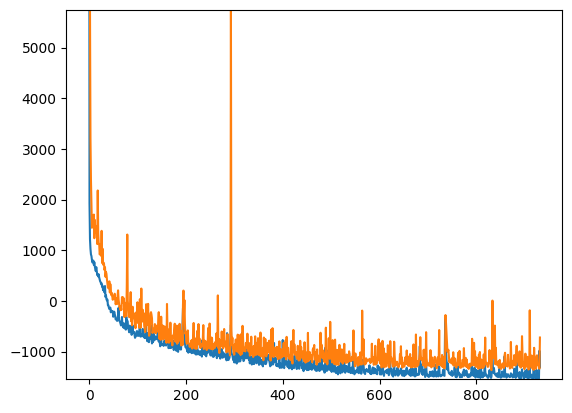

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([min(min(train_curve1),min(valid_curve1) ), 
          max(max(train_curve1[50:]),max(valid_curve1[50:])) ])
# plt.xlim([50, len(train_curve1)])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 4.72984  validloss 4.80181±0.00000  bestvalidloss 4.80181  last_update 0
train: iter 1  trainloss 4.37938  validloss 4.43105±0.00000  bestvalidloss 4.43105  last_update 0
train: iter 2  trainloss 4.09008  validloss 4.12912±0.00000  bestvalidloss 4.12912  last_update 0
train: iter 3  trainloss 3.85755  validloss 3.88959±0.00000  bestvalidloss 3.88959  last_update 0
train: iter 4  trainloss 3.64648  validloss 3.67987±0.00000  bestvalidloss 3.67987  last_update 0
train: iter 5  trainloss 3.45332  validloss 3.46278±0.00000  bestvalidloss 3.46278  last_update 0
train: iter 6  trainloss 3.27802  validloss 3.29563±0.00000  bestvalidloss 3.29563  last_update 0
train: iter 7  trainloss 3.11269  validloss 3.12368±0.00000  bestvalidloss 3.12368  last_update 0
train: iter 8  trainloss 2.95540  validloss 2.95976±0.00000  bestvalidloss 2.95976  last_update 0
train: iter 9  trainloss 2.80580  validloss 2.81743±0.00000  bestvalidloss 2.81743  last_update 0
train: iter 10  trai

train: iter 84  trainloss -1.08702  validloss -0.86396±0.00000  bestvalidloss -0.96194  last_update 4
train: iter 85  trainloss -1.09689  validloss -0.93144±0.00000  bestvalidloss -0.96194  last_update 5
train: iter 86  trainloss -1.12695  validloss -0.86643±0.00000  bestvalidloss -0.96194  last_update 6
train: iter 87  trainloss -1.09967  validloss -0.91521±0.00000  bestvalidloss -0.96194  last_update 7
train: iter 88  trainloss -1.06496  validloss -0.70350±0.00000  bestvalidloss -0.96194  last_update 8
train: iter 89  trainloss -1.10335  validloss -0.89811±0.00000  bestvalidloss -0.96194  last_update 9
train: iter 90  trainloss -1.12460  validloss -0.81737±0.00000  bestvalidloss -0.96194  last_update 10
train: iter 91  trainloss -1.12712  validloss -0.89919±0.00000  bestvalidloss -0.96194  last_update 11
train: iter 92  trainloss -1.15041  validloss -0.92966±0.00000  bestvalidloss -0.96194  last_update 12
train: iter 93  trainloss -1.11109  validloss -0.88014±0.00000  bestvalidloss -

train: iter 167  trainloss -1.16038  validloss -0.94792±0.00000  bestvalidloss -1.05741  last_update 14
train: iter 168  trainloss -1.15294  validloss -0.80555±0.00000  bestvalidloss -1.05741  last_update 15
train: iter 169  trainloss -1.10883  validloss -0.83868±0.00000  bestvalidloss -1.05741  last_update 16
train: iter 170  trainloss -1.12982  validloss -0.80555±0.00000  bestvalidloss -1.05741  last_update 17
train: iter 171  trainloss -1.17013  validloss -0.82711±0.00000  bestvalidloss -1.05741  last_update 18
train: iter 172  trainloss -1.11429  validloss -0.81141±0.00000  bestvalidloss -1.05741  last_update 19
train: iter 173  trainloss -1.12620  validloss -0.78896±0.00000  bestvalidloss -1.05741  last_update 20
train: iter 174  trainloss -1.13568  validloss -0.95377±0.00000  bestvalidloss -1.05741  last_update 21
train: iter 175  trainloss -1.13974  validloss -0.87206±0.00000  bestvalidloss -1.05741  last_update 22
train: iter 176  trainloss -1.17521  validloss -0.73776±0.00000 

train: iter 251  trainloss -1.16860  validloss -0.81826±0.00000  bestvalidloss -1.05741  last_update 98
train: iter 252  trainloss -1.11444  validloss -0.89537±0.00000  bestvalidloss -1.05741  last_update 99
train: iter 253  trainloss -1.18770  validloss -0.90287±0.00000  bestvalidloss -1.05741  last_update 100
train: fin


In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.1706, -2.1829, -3.7513, -4.1640], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 57.03997  validloss 52.89835±0.00000  bestvalidloss 52.89835  last_update 0
train: iter 1  trainloss 43.16734  validloss 41.77089±0.00000  bestvalidloss 41.77089  last_update 0
train: iter 2  trainloss 31.74101  validloss 29.98835±0.00000  bestvalidloss 29.98835  last_update 0
train: iter 3  trainloss 24.12806  validloss 22.59710±0.00000  bestvalidloss 22.59710  last_update 0
train: iter 4  trainloss 18.95311  validloss 17.78958±0.00000  bestvalidloss 17.78958  last_update 0
train: iter 5  trainloss 15.16128  validloss 14.59157±0.00000  bestvalidloss 14.59157  last_update 0
train: iter 6  trainloss 12.45225  validloss 12.31845±0.00000  bestvalidloss 12.31845  last_update 0
train: iter 7  trainloss 10.64951  validloss 10.78667±0.00000  bestvalidloss 10.78667  last_update 0
train: iter 8  trainloss 9.41188  validloss 9.91302±0.00000  bestvalidloss 9.91302  last_update 0
train: iter 9  trainloss 8.57332  validloss 9.37111±0.00000  bestvalidloss 9.37111  last_updat

train: iter 84  trainloss 3.71138  validloss 4.88204±0.00000  bestvalidloss 4.70280  last_update 2
train: iter 85  trainloss 3.71024  validloss 4.64373±0.00000  bestvalidloss 4.64373  last_update 0
train: iter 86  trainloss 3.69178  validloss 4.84646±0.00000  bestvalidloss 4.64373  last_update 1
train: iter 87  trainloss 3.74958  validloss 4.63584±0.00000  bestvalidloss 4.63584  last_update 0
train: iter 88  trainloss 3.69482  validloss 4.69712±0.00000  bestvalidloss 4.63584  last_update 1
train: iter 89  trainloss 3.73269  validloss 4.71548±0.00000  bestvalidloss 4.63584  last_update 2
train: iter 90  trainloss 3.77258  validloss 4.80829±0.00000  bestvalidloss 4.63584  last_update 3
train: iter 91  trainloss 3.69429  validloss 4.73354±0.00000  bestvalidloss 4.63584  last_update 4
train: iter 92  trainloss 3.69271  validloss 4.75357±0.00000  bestvalidloss 4.63584  last_update 5
train: iter 93  trainloss 3.72019  validloss 4.80248±0.00000  bestvalidloss 4.63584  last_update 6
train: ite

train: iter 168  trainloss 3.59757  validloss 4.52045±0.00000  bestvalidloss 4.47772  last_update 8
train: iter 169  trainloss 3.57968  validloss 4.58193±0.00000  bestvalidloss 4.47772  last_update 9
train: iter 170  trainloss 3.60338  validloss 4.62788±0.00000  bestvalidloss 4.47772  last_update 10
train: iter 171  trainloss 3.59095  validloss 4.61456±0.00000  bestvalidloss 4.47772  last_update 11
train: iter 172  trainloss 3.62856  validloss 4.60294±0.00000  bestvalidloss 4.47772  last_update 12
train: iter 173  trainloss 3.63179  validloss 4.48724±0.00000  bestvalidloss 4.47772  last_update 13
train: iter 174  trainloss 3.62132  validloss 4.53087±0.00000  bestvalidloss 4.47772  last_update 14
train: iter 175  trainloss 3.63690  validloss 4.55837±0.00000  bestvalidloss 4.47772  last_update 15
train: iter 176  trainloss 3.59639  validloss 4.48171±0.00000  bestvalidloss 4.47772  last_update 16
train: iter 177  trainloss 3.65371  validloss 4.48085±0.00000  bestvalidloss 4.47772  last_up

train: iter 251  trainloss 3.58244  validloss 4.42297±0.00000  bestvalidloss 4.36347  last_update 9
train: iter 252  trainloss 3.55342  validloss 4.38595±0.00000  bestvalidloss 4.36347  last_update 10
train: iter 253  trainloss 3.58674  validloss 4.61055±0.00000  bestvalidloss 4.36347  last_update 11
train: iter 254  trainloss 3.58136  validloss 4.48492±0.00000  bestvalidloss 4.36347  last_update 12
train: iter 255  trainloss 3.55831  validloss 4.46678±0.00000  bestvalidloss 4.36347  last_update 13
train: iter 256  trainloss 3.59206  validloss 4.43640±0.00000  bestvalidloss 4.36347  last_update 14
train: iter 257  trainloss 3.56743  validloss 4.47140±0.00000  bestvalidloss 4.36347  last_update 15
train: iter 258  trainloss 3.56074  validloss 4.58977±0.00000  bestvalidloss 4.36347  last_update 16
train: iter 259  trainloss 3.58184  validloss 4.37491±0.00000  bestvalidloss 4.36347  last_update 17
train: iter 260  trainloss 3.54181  validloss 4.50309±0.00000  bestvalidloss 4.36347  last_u

train: iter 334  trainloss 3.54305  validloss 4.50002±0.00000  bestvalidloss 4.31436  last_update 22
train: iter 335  trainloss 3.55136  validloss 4.41029±0.00000  bestvalidloss 4.31436  last_update 23
train: iter 336  trainloss 3.50274  validloss 4.45664±0.00000  bestvalidloss 4.31436  last_update 24
train: iter 337  trainloss 3.51212  validloss 4.49047±0.00000  bestvalidloss 4.31436  last_update 25
train: iter 338  trainloss 3.54063  validloss 4.56231±0.00000  bestvalidloss 4.31436  last_update 26
train: iter 339  trainloss 3.51719  validloss 4.37888±0.00000  bestvalidloss 4.31436  last_update 27
train: iter 340  trainloss 3.56960  validloss 4.38391±0.00000  bestvalidloss 4.31436  last_update 28
train: iter 341  trainloss 3.49395  validloss 4.45019±0.00000  bestvalidloss 4.31436  last_update 29
train: iter 342  trainloss 3.60029  validloss 4.39541±0.00000  bestvalidloss 4.31436  last_update 30
train: iter 343  trainloss 3.51268  validloss 4.41510±0.00000  bestvalidloss 4.31436  last_

train: iter 416  trainloss 3.53991  validloss 4.37964±0.00000  bestvalidloss 4.28700  last_update 12
train: iter 417  trainloss 3.55534  validloss 4.45999±0.00000  bestvalidloss 4.28700  last_update 13
train: iter 418  trainloss 3.50984  validloss 4.30775±0.00000  bestvalidloss 4.28700  last_update 14
train: iter 419  trainloss 3.54114  validloss 4.52545±0.00000  bestvalidloss 4.28700  last_update 15
train: iter 420  trainloss 3.51231  validloss 4.39530±0.00000  bestvalidloss 4.28700  last_update 16
train: iter 421  trainloss 3.48050  validloss 4.39717±0.00000  bestvalidloss 4.28700  last_update 17
train: iter 422  trainloss 3.50434  validloss 4.40180±0.00000  bestvalidloss 4.28700  last_update 18
train: iter 423  trainloss 3.52333  validloss 4.34477±0.00000  bestvalidloss 4.28700  last_update 19
train: iter 424  trainloss 3.50119  validloss 4.41615±0.00000  bestvalidloss 4.28700  last_update 20
train: iter 425  trainloss 3.53107  validloss 4.45066±0.00000  bestvalidloss 4.28700  last_

train: iter 499  trainloss 3.46354  validloss 4.49746±0.00000  bestvalidloss 4.27546  last_update 6
train: iter 500  trainloss 3.46539  validloss 4.48211±0.00000  bestvalidloss 4.27546  last_update 7
train: iter 501  trainloss 3.53280  validloss 4.38784±0.00000  bestvalidloss 4.27546  last_update 8
train: iter 502  trainloss 3.51472  validloss 4.58793±0.00000  bestvalidloss 4.27546  last_update 9
train: iter 503  trainloss 3.47618  validloss 4.26614±0.00000  bestvalidloss 4.26614  last_update 0
train: iter 504  trainloss 3.48440  validloss 4.52019±0.00000  bestvalidloss 4.26614  last_update 1
train: iter 505  trainloss 3.52350  validloss 4.59657±0.00000  bestvalidloss 4.26614  last_update 2
train: iter 506  trainloss 3.51159  validloss 4.42299±0.00000  bestvalidloss 4.26614  last_update 3
train: iter 507  trainloss 3.48170  validloss 4.31945±0.00000  bestvalidloss 4.26614  last_update 4
train: iter 508  trainloss 3.49013  validloss 4.44931±0.00000  bestvalidloss 4.26614  last_update 5


train: iter 582  trainloss 3.48493  validloss 4.51172±0.00000  bestvalidloss 4.25920  last_update 34
train: iter 583  trainloss 3.47067  validloss 4.36160±0.00000  bestvalidloss 4.25920  last_update 35
train: iter 584  trainloss 3.46930  validloss 4.35236±0.00000  bestvalidloss 4.25920  last_update 36
train: iter 585  trainloss 3.49814  validloss 4.32570±0.00000  bestvalidloss 4.25920  last_update 37
train: iter 586  trainloss 3.48781  validloss 4.60709±0.00000  bestvalidloss 4.25920  last_update 38
train: iter 587  trainloss 3.47950  validloss 4.47252±0.00000  bestvalidloss 4.25920  last_update 39
train: iter 588  trainloss 3.46787  validloss 4.55507±0.00000  bestvalidloss 4.25920  last_update 40
train: iter 589  trainloss 3.46224  validloss 4.30495±0.00000  bestvalidloss 4.25920  last_update 41
train: iter 590  trainloss 3.48603  validloss 4.34680±0.00000  bestvalidloss 4.25920  last_update 42
train: iter 591  trainloss 3.44419  validloss 4.39151±0.00000  bestvalidloss 4.25920  last_

train: iter 666  trainloss 3.48582  validloss 4.37865±0.00000  bestvalidloss 4.23236  last_update 54
train: iter 667  trainloss 3.44912  validloss 4.44099±0.00000  bestvalidloss 4.23236  last_update 55
train: iter 668  trainloss 3.50324  validloss 4.57591±0.00000  bestvalidloss 4.23236  last_update 56
train: iter 669  trainloss 3.47652  validloss 4.38032±0.00000  bestvalidloss 4.23236  last_update 57
train: iter 670  trainloss 3.47875  validloss 4.48903±0.00000  bestvalidloss 4.23236  last_update 58
train: iter 671  trainloss 3.49043  validloss 4.48785±0.00000  bestvalidloss 4.23236  last_update 59
train: iter 672  trainloss 3.46860  validloss 4.52599±0.00000  bestvalidloss 4.23236  last_update 60
train: iter 673  trainloss 3.47987  validloss 4.42824±0.00000  bestvalidloss 4.23236  last_update 61
train: iter 674  trainloss 3.44435  validloss 4.37930±0.00000  bestvalidloss 4.23236  last_update 62
train: iter 675  trainloss 3.45015  validloss 4.60978±0.00000  bestvalidloss 4.23236  last_

train: iter 750  trainloss 3.47909  validloss 4.35033±0.00000  bestvalidloss 4.18941  last_update 54
train: iter 751  trainloss 3.43178  validloss 4.30621±0.00000  bestvalidloss 4.18941  last_update 55
train: iter 752  trainloss 3.55265  validloss 4.31818±0.00000  bestvalidloss 4.18941  last_update 56
train: iter 753  trainloss 3.42723  validloss 4.30094±0.00000  bestvalidloss 4.18941  last_update 57
train: iter 754  trainloss 3.51408  validloss 4.77196±0.00000  bestvalidloss 4.18941  last_update 58
train: iter 755  trainloss 3.48138  validloss 4.47551±0.00000  bestvalidloss 4.18941  last_update 59
train: iter 756  trainloss 3.42758  validloss 4.55975±0.00000  bestvalidloss 4.18941  last_update 60
train: iter 757  trainloss 3.46103  validloss 4.38336±0.00000  bestvalidloss 4.18941  last_update 61
train: iter 758  trainloss 3.44217  validloss 4.49632±0.00000  bestvalidloss 4.18941  last_update 62
train: iter 759  trainloss 3.42752  validloss 4.37808±0.00000  bestvalidloss 4.18941  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-11.2688)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(18.2626)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.4455875819564994
tensor([-0.2217])
